# Сборный проект

**Получение первоначальной информации**

    Из открытих источников представлены данные (файл: /datasets/games.csv) о релизах и продажах игр за определенный период времени, оценки пользователей и экспертов этих игр, жанрах, платформах для которых они разрабатывались, а также возрастных рекомендациях. 

**Поставленная Цель исследования**
    
    Для руководства интернет магазина "Стримчик" (интернет магазин продающий компьютерные игры по всему миру) требуется отработать принцип работы с данными и выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
    
    'Name' — название игры
    'Platform' — платформа
    'Year_of_Release' — год выпуска
    'Genre' — жанр игры
    'NA_sales' — продажи в Северной Америке (миллионы проданных копий)
    'EU_sales' — продажи в Европе (миллионы проданных копий)
    'JP_sales' — продажи в Японии (миллионы проданных копий)
    'Other_sales' — продажи в других странах (миллионы проданных копий)
    'Critic_Score' — оценка критиков (максимум 100)
    'User_Score' — оценка пользователей (максимум 10)
    'Rating' — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Исследование проведем в соответствии с планом:**
    
    1) Изучим общую информацию
    2) Подготовим данных
    3) Проведем исследовательский анализ данных
    4) Составим портрет пользователя каждого региона
    5) Напишем вывод

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# Импортируем необходимые для работы с проектом библиотеки
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

#### Загрузим данные из файла в датафрейм.

In [2]:
# Создадим датафрейм
df = pd.read_csv('/datasets/games.csv')
# Ознакомимся с первыми 5 строками
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изучим информацию о полученном датафрейме.

In [3]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# количество явных дубликатов
df.duplicated().sum()

0

In [5]:
# Количество неявных дубликатов найденных по основным идентификационным столбцам
df[df.duplicated(['Name', 'Platform', 'Year_of_Release'])].count()

Name               1
Platform           2
Year_of_Release    2
Genre              1
NA_sales           2
EU_sales           2
JP_sales           2
Other_sales        2
Critic_Score       1
User_Score         1
Rating             1
dtype: int64

***

#### Вывод по изучению общей информации о полученых данных:

<font color='green'> ***В ходе изучения полученных данных выявлено, что в данных присутствует 16715 строк подразделенных на 11 столбцов. В столбцах используется разный регистр, имеются пропущенные значения и указан неккоректный тип данных, при этом явные дубликаты отсутствуют, а неявные имеют малочисленный характер. Данные требуют обработки.*** </font>

### Подготовка данных

#### Приведем к одному виду названия столбцов. Устраним неявные дубликаты.

##### Изменим регистр названия столбцов на нижний.

In [6]:
# Отобразим названия столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Найденно два неявных повтора по основным столбцам содержащим данные о названии игры, используемой платформы и года релиза. Выведем эти строки и удалим с последующей проверкой.

In [8]:
# Отобразим неявные дубликаты
print(df[df.duplicated(['name', 'platform', 'year_of_release'])])

                name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03          0.0           NaN        NaN    NaN  
16230      0.00          0.0          83.0        5.5      E  


In [9]:
# Устраним неявные дубликаты
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])
print(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


#### Обработаем пропущенные значения столбцов датафрейма.

In [10]:
# Определим в каких столбцах есть пропуски
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

##### Столбец `'name'`,  содержащий имя игры, имеет только один пропуск, что составляет  0.006% данных и является незначительным. Имеет смысл удалить строку с пропуском.

In [11]:
# Посчитаем количество пропусков столбца `name` в процентном соотношении
print((df['name'].isnull().sum() / len(df['name'])*100).round(3))

0.006


In [12]:
# Удалим строку с пропуском в столбце 'name'
df = df.dropna(subset=['name'])
# Проверим количесвто пропусков
df['name'].isna().sum()

0

##### Столбец `'year_of_release'`, содержащий сведения о годе релиза, имеет пропуски в 1.61% от общего количесвта данных, что является малозначительным. Имеет смысл удалить строки не имеющие значения.

In [13]:
# Посчитаем количество пропусков столбца `year_of_release` в процентном соотношении
print((df['year_of_release'].isnull().sum() / len(df['year_of_release'])*100).round(3))

1.61


In [14]:
# Удалим строку с пропуском в столбце 'year_of_release'
df = df.dropna(subset=['year_of_release'])
# Проверим количесвто пропусков
df['year_of_release'].isna().sum()

0

##### В столбце `'critic_score'`, содержащем сведения об оценках критиков, пропущено более 51% данных, что явялется внушительным объемом. Заполнение средними и медианными значениями нецелесообразно. Имеет смысл заполнить отметкой пропущенные ячейки параметром отсутствующим в наборе значений, например `'-1'`, для облегчения последующего анализа данных.

In [15]:
# Посчитаем количество пропусков столбца `critic_score` в процентном соотношении
print((df['critic_score'].isnull().sum() / len(df['critic_score'])*100).round(3))

51.457


In [16]:
# Заполним пропущенные значения отметкой '-1'
df['critic_score'] = df['critic_score'].fillna(-1)
# Проверим количесвто пропусков
df['critic_score'].isna().sum()

0

##### В столбце `'user_score'`, содержащем сведения об оценках игроков, пропущено более 40% данных. Заполнение средними и медианными значениями также нецелесообразно. Заполним отметкой пропущенные ячейки параметром отсутствующим в наборе значений, например `'-1'`, для облегчения последующего анализа данных.

In [17]:
# Посчитаем количество пропусков столбца `critic_score` в процентном соотношении
print((df['user_score'].isnull().sum() / len(df['user_score'])*100).round(3))

40.169


In [18]:
# Заполним пропущенные значения отметкой '-1'
df['user_score'] = df['user_score'].fillna(-1)
# Проверим количесвто пропусков
df['user_score'].isna().sum()

0

##### В столбце `'user_score'` 14% данных заполнены неописанным строковым типом `'tbd'`. Заменим его отметкой - параметром отсутствующим в наборе значений, например `'-2'`, для облегчения последующего анализа данных.

In [19]:
# Отобразим количество используемых значений в столбце 'user_score'
df['user_score'].value_counts() 

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.2       2
1         2
0.7       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [20]:
# Посчитаем количество значений 'tbd' столбца `critic_score` в процентном соотношении
df[df['user_score']=='tbd']['user_score'].count() / len(df['name'])*100

14.449917898193759

In [21]:
# Заменим значение 'tbd' столбца `critic_score` отметкой '-2'
df.loc[df['user_score'] == 'tbd', 'user_score'] = -2
# Проверим изменения
df['user_score'].value_counts() 

-1     6605
-2     2376
7.8     322
8       285
8.2     276
       ... 
0.2       2
1         2
0.7       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

##### В столбце `'rating'`, содержащим сведения о возрастной категории, также пропущено более 40% данных. По аналогии с предыдущим, заполнение средними и медианными значениями нецелесообразно. Имеет смысл заполнить пропущенные значения параметром `'unknown'`, для облегчения последующего анализа данных, так как возрастная категория нам неизвестна.

In [22]:
# Посчитаем количество пропусков столбца `critic_score` в процентном соотношении
print((df['rating'].isnull().sum() / len(df['rating'])*100).round(3))

40.601


In [23]:
# Заполним пропущенные значения параметром 'unknown'
df['rating'] = df['rating'].fillna('unknown')
# Проверим количесвто пропусков и количество других значений
print('Количество пропусков столбца `rating` =', df['rating'].isna().sum())
print('Количество остальных значений:')
print(df['rating'].value_counts())

Количество пропусков столбца `rating` = 0
Количество остальных значений:
unknown    6676
E          3920
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64


#### Преобразуем типы данных в тех столбцах где это необходимо.

In [24]:
#Изучим используемые в датафрейме типы данных
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

##### Столбец `'year_of_release'` имеет тип вещественного числа, при этом все строки стоблбца целочисленны, имеет смысл преобразования в тип данных 'int'.

In [25]:
# Преобразуем в целочисленный тип данных
df['year_of_release'] = (df['year_of_release']).astype('int')
# Проверим тип данных
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

##### Столбец `'critic_score'` имеет тип вещественного числа, при этом все строки стоблбца также целочисленны, имеет смысл преобразования в тип данных 'int'.

In [26]:
# Преобразуем в целочисленный тип данных
df['critic_score'] = (df['critic_score']).astype('int')
# Проверим тип данных
df['critic_score'].head()

0    76
1    -1
2    82
3    80
4    -1
Name: critic_score, dtype: int64

##### Столбец `'user_score'` имеет строковый тип, при этом строки стоблбца, после замены значения `'tbd'`, теперь  относятся к вещественным числам, имеет смысл преобразования в тип данных 'float'.

In [27]:
# Преобразуем в тип данных 'float'
df['user_score'] = (df['user_score']).astype('float')
# Проверим тип данных
df['user_score'].head()

0    8.0
1   -1.0
2    8.3
3    8.0
4   -1.0
Name: user_score, dtype: float64

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [28]:
# Создадим столбец содержащий данные о сумме всех продаж регионов
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
# Выведем первый пять строк датафрейма
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


___
#### Вывод по подготовке данных:
<font color='green'> ***При подготовке данных, в датафрейме были выполнены следующие действия:***
1. ***К общему, путем применения нижнего регистра, приведены все названия столбцов датафрейма;***
2. ***Выявлены и устранены неявные дубликаты в столбцах содержащих данные о названии игры, используемой платформы и года релиза.***
3. ***Удалены пропуски в следующих столбцах:***
|Пропуски | Было | Стало|
|-|-|-|
| name | 1 | 0 |
| year_of_release | 269 | 0 |
| critic_score | 8577 | 0 |
| user_score | 6700 | 0 |
| rating | 6765 | 0 |
*Основными причинами пропусков могли стать:*
- *Человеческий фактор (пропустил, не увидел, отвлекся, забыл, не посчитал нужным и т.д.);*
- *Недоработка форм для заполнения данных (отсутствие обязательных полей и предлагаемых вариантов или просто проверки данных);*
- *Программный или аппаратный сбой. Обновление системы во время заполнения данных;*
- *Сбор данных из различных источников, которые не согласованы между собой.*
4. ***В столбце `'user_score'` неописанное значение `'tbd'` обозначено как `'-2'`.***
5. ***В соответствии с данными находящимся в столбцах был изменен их тип:***
|Тип данных | Было | Стало| Причина |
|-|-|-|-|
| year_of_release | float64 | int64 | Содержит только целые числа |
| critic_score | float64 | int64 | Содержит только целые числа |
| user_score | object | float64 | Содержит вещественные значения |
||||

6. ***В датафрейме создан столбец `'total_sales'` содержащий данные о сумме всех продаж регионов.*** </font>

### Проведем исследовательский анализ данных

#### Проведем исследование о количестве выпущенных игр в разные годы.

##### Сгенерируем описательную статистику для столбца содержащего информацию о годе релиза.

In [29]:
# Применим метод описательной статистики к столбцу с годом релиза игр
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

##### Построим график по количесвту выпущенных в каждом году игр, из имеющихся в датафрейме данных..

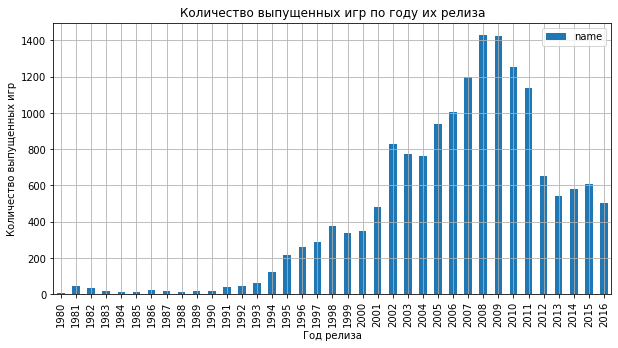

In [30]:
# Построим график количесвта выпущенных игр по году их релиза
(
    df
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество выпущенных игр по году их релиза')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.show()

##### Подведем итоги исследования о количестве выпущенных игр в разные годы:

* *В датафрейме имеются данные об играх, релиз которых состоялся начиная с 1980 по 2016 годы;*
* *Учитывая удаленные в прошлом шаге пустые строки, в исходном датафрейме имелись игры без указания года релиза в количестве 269;*
* *Экспоненциальный рост графика указывает на взрывное увеличение выпуска игр примерно с 1994 по 2008 годы, далее до 2012 года наблюдается спад и дальнейшая стабилизация в районе 500 игр в год;*
* *Для проведения исследования целесообразно выбрать период за не более 5-10 последних лет, в связи с потерей интереса у игроков к старым играм, стремительным ростом вычислительных мощностей игровых платформ, сильного влияния на рынок ожидаемых игровых новинок.*



#### Проведем исследование о продажах игр на разных платформах и сроках актуальности игровых платформ.

##### Построим график взаимосвязи количества суммарных продаж и используемых игровых платформ, из имеющихся в датафрейме данных.

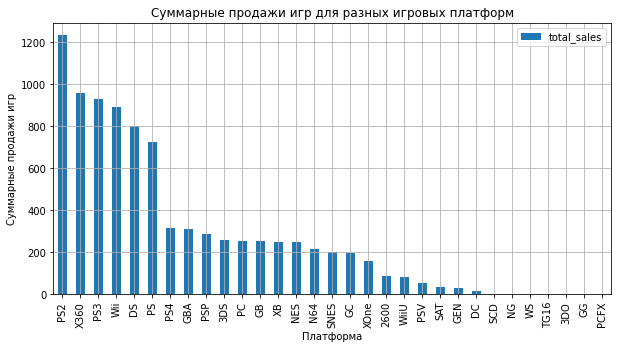

In [31]:
# Построим график суммарных продаж игр для разных игровых платформ
(
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Суммарные продажи игр для разных игровых платформ')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи игр')
plt.show()

*Наибольшими суммарными продажами согласно построенного графика обладают 6 платформ: `'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'`.*

##### Выберем платформы с наибольшими суммарными продажами и построим распределение по годам релиза выпущенных для них игр. 

######  Наибольшими суммарными продажами согласно вышепостроенного графика обладают 6 платформ `'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'`, создадим переменную в которую включим эти данные. 

In [32]:
# Cоздадим переменную в которую включим 6 платформ с максимальными продажами.
top_platform_sales = (
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
    .head(6)['platform']
    .tolist()
    )
top_platform_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

######  Для определения характерного срока появления новых и ухода старых игровых платформ, построим график сроков популярности 6 платформ имеющих максимальные продажи `'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'`.

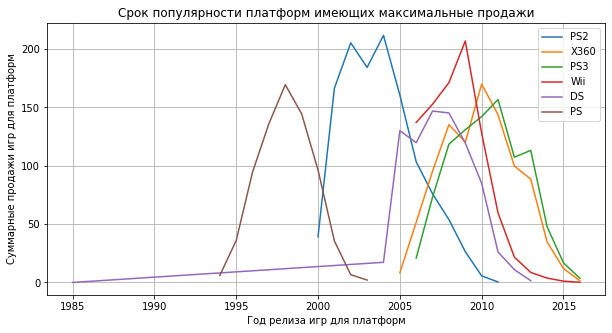

In [33]:
# Построим график сроков популярности платформ имеющих максимальные продажи
for name in top_platform_sales:
    (
    df.query('platform == @name and year_of_release > -1')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(grid=True, figsize = (10, 5), label=name)
    )
    plt.title('Срок популярности платформ имеющих максимальные продажи')
    plt.xlabel('Год релиза игр для платформ')
    plt.ylabel('Суммарные продажи игр для платформ')
    plt.legend() 

###### На графике прослеживается явная аномалия связанная с карманной игровой консолью 'Nintendo DS'. С учетом того что консоль была выпущена только в 2004 году, в датафрейме имеется неправильная запись, вызывающая выявленную аномалию. Выявим и удалим указанную запись, а затем перестроим график.

In [34]:
# Выявим неверную запись в датафрейме
print(df.query('platform == "DS" and year_of_release < 1990'))

                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0            -1        -1.0   

        rating  total_sales  
15957  unknown         0.02  


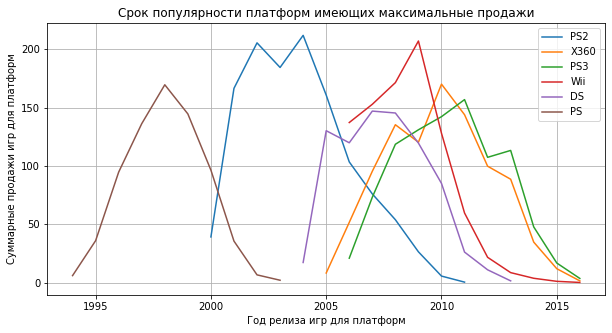

In [35]:
# Удалим выявленую строку по ее индексу
df = df.drop(index = 15957)
# Перестроим график сроков популярности платформ имеющих максимальные продажи
for name in top_platform_sales:
    (
    df.query('platform == @name and year_of_release > -1')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(grid=True, figsize = (10, 5), label=name)
    )
    plt.title('Срок популярности платформ имеющих максимальные продажи')
    plt.xlabel('Год релиза игр для платформ')
    plt.ylabel('Суммарные продажи игр для платформ')
    plt.legend() 

##### Подведем итоги исследования о продажах игр на разных платформах и сроках актуальности игровых платформ:

* *Среди представленных в датафрейме консолей 7 практически не имели продаж игр, 7 имели продажи ниже среднего, у 11 были средние продажи, у 5 выше среднего и только у одной платформы они были макисмальные;*
* *Наибольшими суммарными продажами обладают 6 платформ, одна от компании Microsoft ('X360'), две от компаний Nintendo('Wii', 'DS') и три от компании Sony ('PS2', 'PS3', 'PS');*
* *Среди самых популярных консолей примерно с  1994 по 2006 годы абсолютное лидерство принадлежало компании Sony ('PS' и 'PS2'). Примерно с 2004 года остальные консоли развивались на одном уровне и теряли популярность с промежутком в один-два года ('DS', 'X360', 'Wii', 'PS3');*
* *Характерными сроками появления новых и исчезновения старых платформ можно считать срок в 10 лет.*

#### Проведем исследование для определения актуального периода при выборе данных сыграющих роль при построении прогноза на 2017 год.

#####  Расчитаем медианное значение срока популярности для всех игрвых платформ.

In [36]:
# Создадим выборку со сроками популярности всех игровых платформ
popular_time = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# включим в срок популярности платформы границы диапазона (+1)
popular_time['life'] = popular_time['max'] - popular_time['min'] + 1
# Расчитаем медиану и выведем на экран
print('Медианное значение срока популярности для всех игрвых платформ составляет', popular_time['life'].median(), 'лет')

Медианное значение срока популярности для всех игрвых платформ составляет 7.0 лет


#####  Для определения актуального периода целесообразно использовать данные о росте продажах по платформам или их нахождения на пике. Высчитаем первую половину срока популярности для всех игрвых платформ, с округлением в большую сторону.

In [37]:
# Высчитаем первую половину срока популярности с округлением в большую сторону.
t = np.ceil(popular_time['life'].median()/2)
print('Определим, что актуальным периодом являются последние', t, 'года')

Определим, что актуальным периодом являются последние 4.0 года


##### Подведем итоги исследования для определения актуального периода при выборе данных играющих роль при построении прогноза на 2017 год:

* *В результате исследования предыдущих вопросов было определено, что актуальным периодом для проведения дальнейших исследований явялется период от 10 лет и менее;*
* *Для определения актуального периода целесообразно использовать данные о росте продажах по платформам или их нахождения на пике. Другими словами для нас интересны платформы релиз которых состоялся 3-5 годами ранее и которые активно растут в продажах;*
* *Первая половина срока популярности для всех игрвых платформ составляет 4 года;*
* *Определим, что актуальный период при выборе данных играющих роль при построении прогноза на 2017 год составляет 4 последних года.*

#### Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

##### Подготовим список игровых платформ используемых в актуальный период.

In [38]:
# Определим игровые платформы используемые с 2012 года
actual_platforms = (
    df.query('year_of_release >= 2016-@t')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(10)['platform'].tolist()
    )                         
actual_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

##### Создадим датафрейм для игр с релизом от 2012 года.

In [39]:
# Создадим датафрейм для актуального периода
actual_df = df.query('year_of_release >= 2016-@t').copy().reset_index(drop= True)
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


#####  Построим график для определения какие платформы лидируют по продажам, растут или падают, а также выбора нескольких потенциально прибыльных платформ в актуальном периоде.

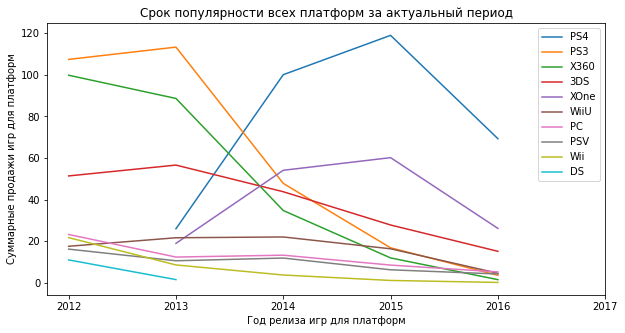

In [40]:
# Построим график игровых платформ используемых с 2012 года
for name in actual_platforms:
    (
    actual_df.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=name)
    )
    plt.title('Срок популярности всех платформ за актуальный период')
    plt.xticks(np.arange(2012, 2018, step=1))
    plt.xlabel('Год релиза игр для платформ')
    plt.ylabel('Суммарные продажи игр для платформ')
    plt.legend() 

##### Подведем итоги какие платформы лидируют по продажам, растут или падают и выбору несколько потенциально прибыльных платформ в актуальном периоде:

* *На 2016 год нет явно возрастающих продаж игр для консолей. Продажи падают на всех консолях. Относительно перспективными можно назвать консоли 'PS4' и 'XOne', но у них также прослеживается спад продаж.*

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам для актуального периода. Опишем результат.

##### Воспользуемся методом описательной статистики для данных с общими продажами игр в актуальном периоде:

In [41]:
# Применим метод описательной статистики
actual_df['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

##### Построим график 'Boxplot' по глобальным продажам игр в разбивке по платформам для актуального периода:

Text(0, 0.5, 'Продажи по платформам')

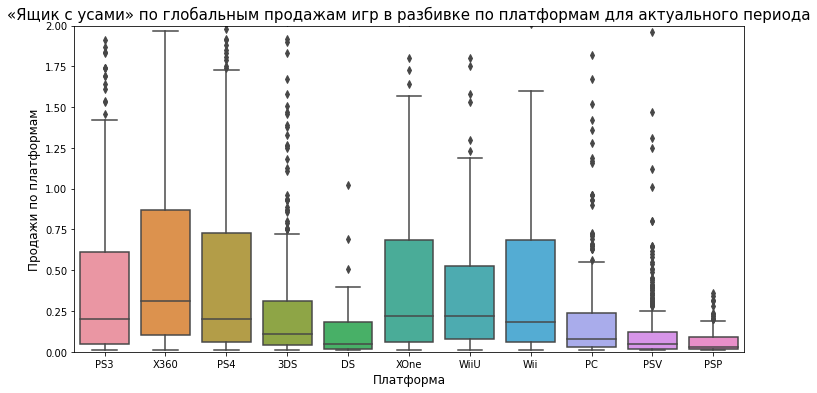

In [42]:
# Построим график 'Boxplot'
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам для актуального периода', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12)

##### Подведем итоги построения графика «ящик с усами» и применения метода описательной статистики по глобальным продажам игр в разбивке по платформам для актуального периода:

* *Медианное значение по всей выборке составляет 0,12 но у большинства консолей данный показатель не совпадает с основным*;
* *По первой и третьей квартили также наблюдается большой разброс;*
* *По всем консолям присутствуют выбросы по продажам.*

#### Оценим, как влияют на продажи внутри самых популярных платформ отзывы пользователей и критиков в актуальном периоде. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

##### Отберем 5 игровых платформ с максимальными продажами в актуальном периоде.

In [43]:
# Создадим выборку5 игровых платформ с максимальными продажами
actual_platforms_5 = (
    actual_df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
    )                         
actual_platforms_5

['PS4', 'PS3', 'X360', '3DS', 'XOne']

##### Построим диаграмму распределения и вычислим корреляцию между оценкой пользователей и продажами в разрезе отдельных платформ  в актуальном периоде.

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.031957110204556376


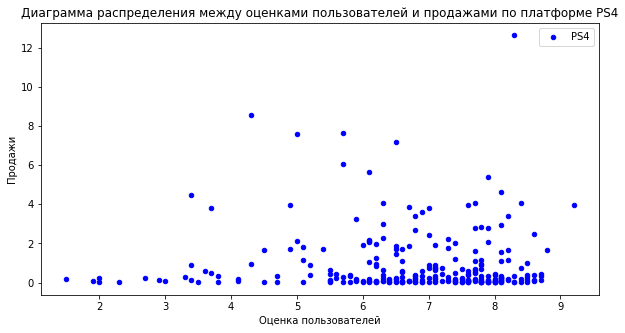

Корреляция между оценками пользователей и продажами по платформе PS3  = -0.006205767686051523


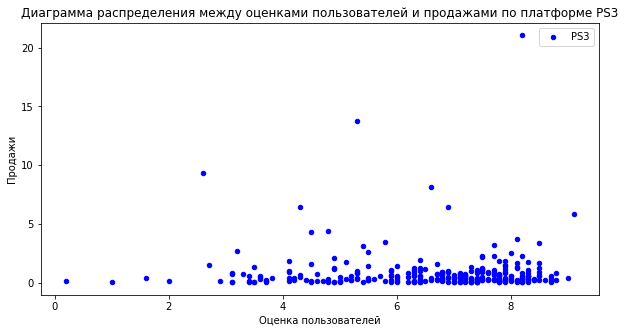

Корреляция между оценками пользователей и продажами по платформе X360  = 0.006163978646213326


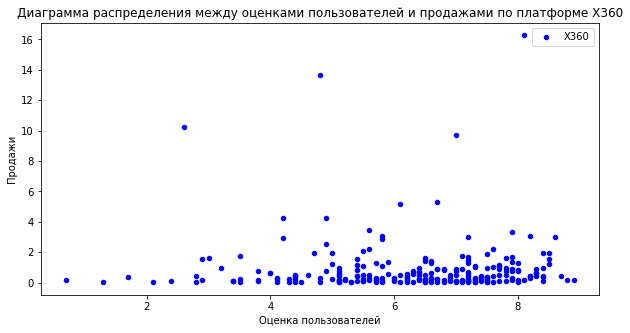

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.19758263411038599


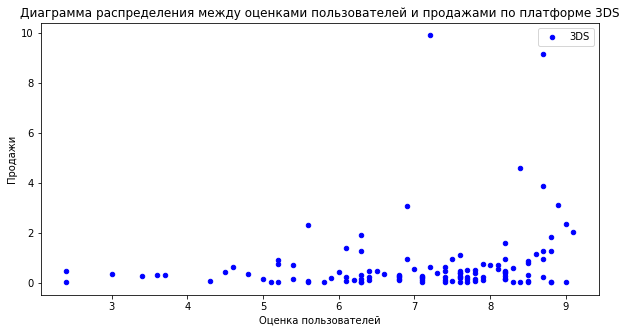

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414


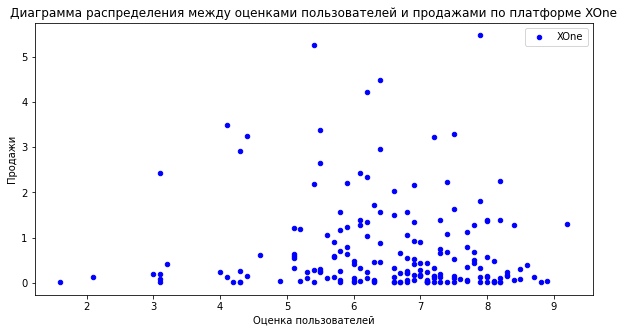

In [44]:
# Построим диаграммы распределения
for name in actual_platforms_5:
    (
    actual_df
        .query('platform == @name and user_score > -1')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
    )
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками пользователей и продажами по платформе {name}  =', actual_df.query('platform == @name and user_score > -1')['user_score'].corr(actual_df.query('platform == @name and user_score > -1')['total_sales']))
    plt.show()

***Диаграммы распределения указывают на слабую связь между оценкой пользователей и продажами в разрезе отдельных платформ. Коэффициент корреляции подтверждает это, лишь в некоторых случаях он приближается к 0,2.***

##### Построим диаграмму распределения и вычислим корреляцию между оценкой критиков и продажами в разрезе отдельных платформ в актуальном периоде.

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40656790206178095


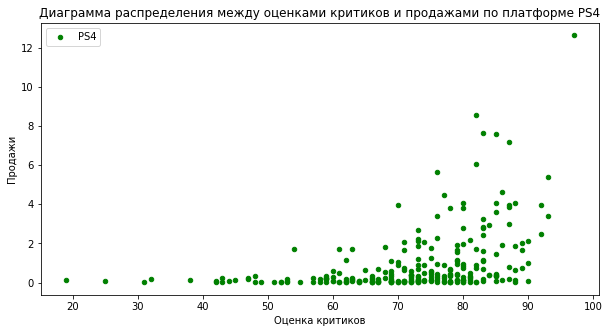

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3341517575509856


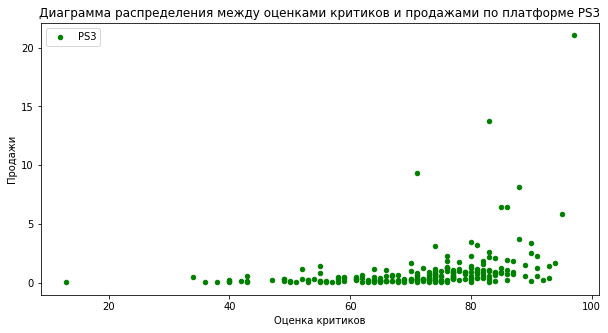

Корреляция между оценками критиков и продажами по платформе X360  = 0.3605734888507336


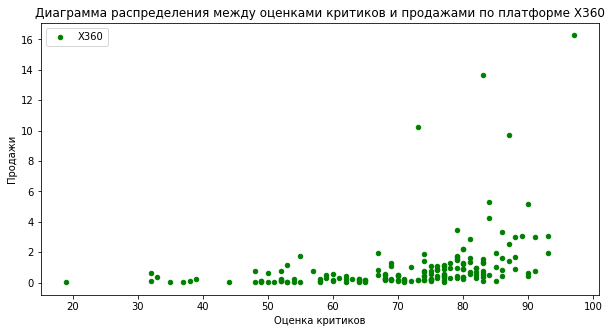

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3208028695360785


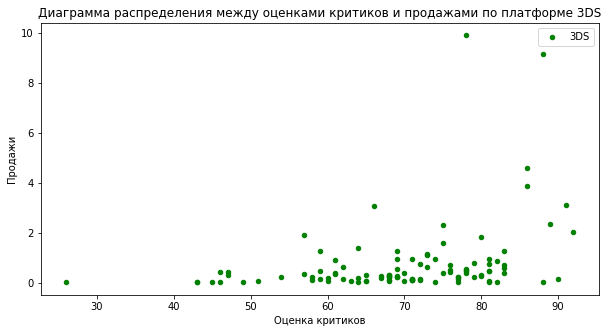

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


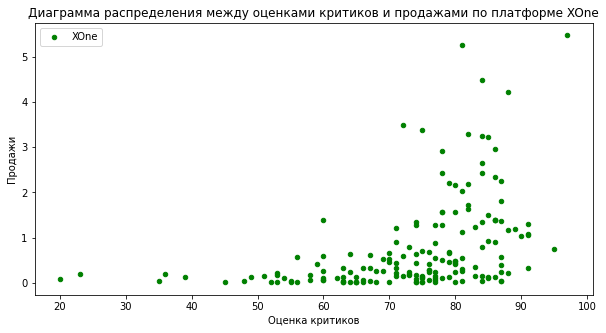

In [45]:
# Построим диаграммы распределения
for name in actual_platforms_5:
    (
    actual_df
        .query('platform == @name and critic_score > -1')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='green')
    )
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками критиков и продажами по платформе {name}  =', actual_df.query('platform == @name and critic_score > -1')['critic_score'].corr(actual_df.query('platform == @name and critic_score > -1')['total_sales']))
    plt.show()

***Диаграммы распределения указывают на умеренную связь между оценкой критиков и продажами в разрезе отдельных платформ. Соответствующий коэффициент корреляции подтверждает это, колеблется от 0,32 до 0,42.***

##### Подведем итоги оценки, как влияют на продажи внутри самых популярных платформ отзывы пользователей и критиков в актуальном периоде, на соновании диаграмм рассеяния и подсчета корреляции между отзывами и продажами:

* *Диаграммы зависимости оценок на показатели продаж и коэффициенты корреляции по отдельным платформам указывают, что:*

   - между оценками пользователей и продажами связь отсутствует или очень слабая, линия зависимости не прослеживается;
   - между оценками критиков и продажами связь умеренная, линия зависимости прослеживается слабо.

#### Соотнесем выводы по оценке влияния на продажи внутри популярных платформ отзывов пользователей и критиков в актуальном периоде с продажами игр на других платформах. 

##### Построим диаграмму распределения и вычислим корреляцию между оценкой пользователей и продажами для всего набора данных  в актуальном периоде.

In [46]:
# Вычислим общую корреляцию
print('Общая корреляция между оценками пользователей и продажами = ', actual_df.query('user_score > -1')['user_score'].corr(actual_df['total_sales']))

Общая корреляция между оценками пользователей и продажами =  0.0041944811069172284


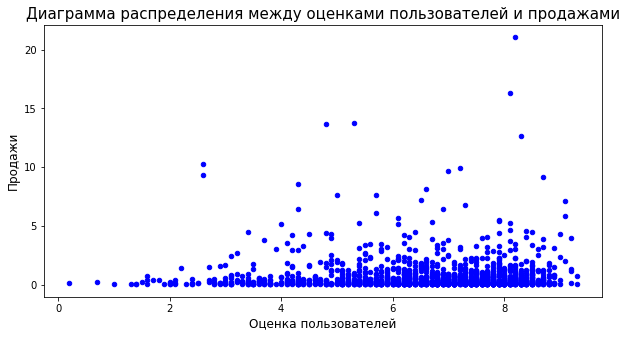

In [47]:
# Построим диаграмму распределения
(
 actual_df.query('user_score > -1')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
)
plt.title('Диаграмма распределения между оценками пользователей и продажами', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

***Диаграмма распределения указывает на слабую связь между оценкой пользователей и продажами по всей совокупности данных (коэфициент корреляции приближается к 0,004).***

##### Построим диаграмму распределения и вычислим корреляцию между оценкой критиков и продажами для всего набора данных в актуальном периоде.

In [48]:
# Вычислим общую корреляцию
print('Общая корреляция между оценками критиков и продажами = ', actual_df.query('critic_score > -1')['critic_score'].corr(actual_df['total_sales']))

Общая корреляция между оценками критиков и продажами =  0.30863336128976016


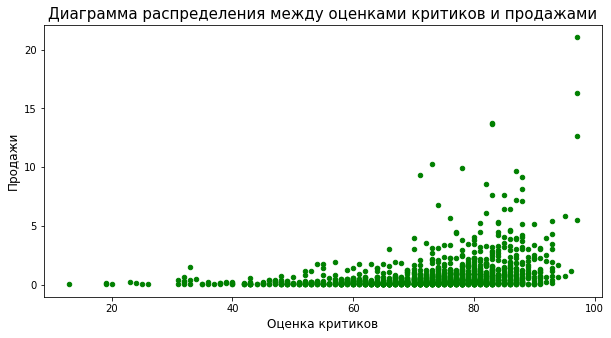

In [49]:
# Построим диаграмму распределения
(
 actual_df.query('critic_score > -1')
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='green')
)
plt.title('Диаграмма распределения между оценками критиков и продажами', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

***Диаграмма распределения указывает на умеренную связь между оценкой критиков и продажами по всей совокупности данных коэффициент корреляции подтверждает это и приближается к 0,31.***

##### Подведем итоги оценки, как влияют на продажи внутри всех платформ отзывы пользователей и критиков в актуальном периоде, на соновании диаграмм рассеяния и подсчета корреляции между отзывами и продажами:

*Диаграммы зависимости оценок на показатели продаж и коэффициенты корреляции по отношению к общим показателям указывают на то что, по всем платформам:*
   - между оценками пользователей и продажами связь отсутствует или очень слабая, линия зависимости не прослеживается;
   - между оценками критиков и продажами связь умеренная, линия зависимости прослеживается слабо.
   
*Полученные результаты полностью подтверждают выводы прошлого шага.*

#### Проведем исследование общего распределения игр по жанрам в актуальном периоде. 

##### Построим график с суммой продаж игр по жанрам. В разрезе жанров определим самые прибыльные игры и определим сумму продаж.

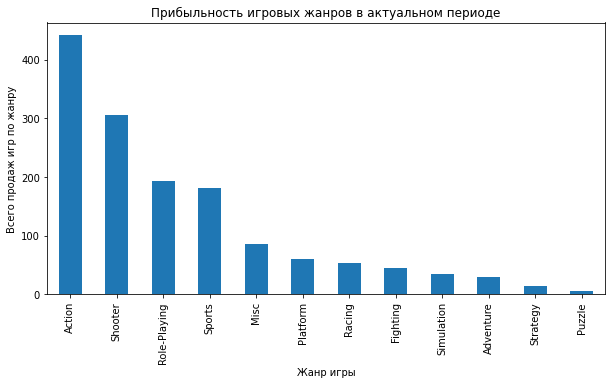

In [50]:
# Построим график по прибыльности игровых жанров в актуальном периоде
(actual_df
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Прибыльность игровых жанров в актуальном периоде')
 .set(xlabel='Жанр игры', ylabel='Всего продаж игр по жанру'))

plt.show()

##### Построим диаграмму размаха продаж игр по перспективным жанрам.

Text(0, 0.5, 'Продажи по жанрам')

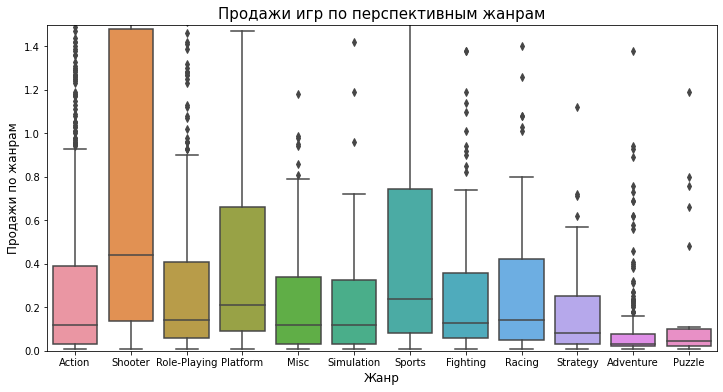

In [51]:
# Построим диаграмму размаха
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='genre', y='total_sales')
ax.set(ylim=(0,1.5))
plt.title('Продажи игр по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)

##### Вычислим медианные значения продаж игр по перспективным жанрам в актуальном периоде.

In [52]:
# Построим сводную таблицу с медианными значениями
(
 actual_df
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values('total_sales', ascending=False)
)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


##### Подведем итоги исследования общего распределения игр по жанрам в актуальном периоде:

* *За последние четыре года наиболее востребованными жанрами среди игр являются 'Action' и 'Shooter'.*  
* *Дополнительное исследование и сравнение медианных значений по продажам в разрезе жанров указывает, что предпочтение в жанрах надо отдавать Shooter, Sports обладающих большим медианным значением прибыли.*

___
#### Вывод по исследовательскому анализу данных:
<font color='green'> ***При провдении исследований были сделаны следующие выводы:***
* ***Для проведения исследования целесообразно выбрать период за не более 5-10 последних лет, в связи с потерей интереса у игроков к старым играм, стремительным ростом вычислительных мощностей игровых платформ, сильного влияния на рынок ожидаемых игровых новинок;***
* ***Характерными сроками появления новых и исчезновения старых платформ можно считать срок в 10 лет;***
* ***Актуальный период при выборе данных играющих роль при построении прогноза на 2017 год составляет 4 последних года;***
* ***На 2016 год нет явно возрастающих продаж игр для консолей. Продажи падают на всех консолях. Относительно перспективными можно назвать консоли 'PS4' и 'XOne', но у них также прослеживается спад продаж;***
* ***Между оценками пользователей и продажами игр слабая связь и нелинейная;***
* ***Между оценками критиков и продажами игр связь умеренная и скорее всего нелинейная;***
* ***Перспективными игровыми жанрами обладающих большим медианным значением прибыли можно считать 'Shooter' и 'Sports'.*** </font>

### Составим портрет пользователя каждого региона. 

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

##### Построим сводную таблицу самых популярных платформ (топ-5) по регионам за актуальный период.

In [53]:
# Построим сводную таблицу
na = (
      actual_df
        .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'platform'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
eu = (
      actual_df
        .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'platform'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
jp = (
      actual_df
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'platform'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
ps = pd.merge(na, eu, left_index=True, right_index=True)
ps = pd.merge(ps, jp, left_index=True, right_index=True)
ps.rename(columns = {'platform_x':'na_platform', 'platform_y':'eu_platform', 'platform':'jp_platform'}, inplace = True )

ps

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,140.05,PS4,141.09,3DS,87.79
1,PS4,108.74,PS3,106.85,PS3,35.29
2,PS3,103.38,X360,74.52,PSV,21.04
3,XOne,93.12,XOne,51.59,PS4,15.96
4,3DS,55.31,3DS,42.64,WiiU,13.01
5,Other,90.37,Other,90.12,Other,19.49


##### Построим круговые диаграммы самых популярных платформ (топ-5) по регионам за актуальный период.

In [54]:
# Создадим датафрейф с разбивкой по регионам
data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'platform': ['na_platform', 'eu_platform', 'jp_platform'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data) 
regions

,region,platform,sales
0,NA - Америка,na_platform,na_sales
1,EU - Европа,eu_platform,eu_sales
2,JP - Япония,jp_platform,jp_sales


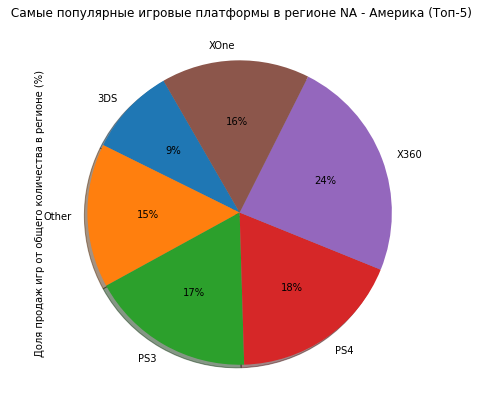

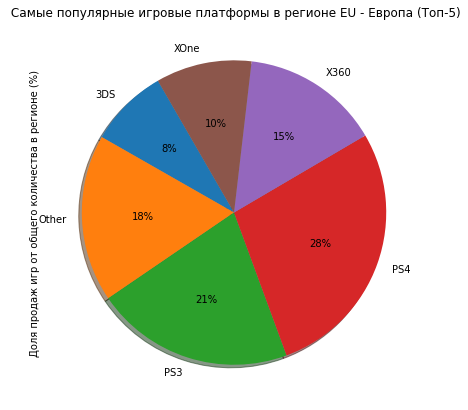

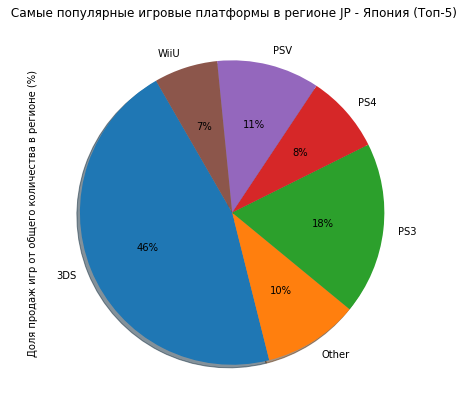

In [66]:
# Построим круговые диаграммы
for i in regions.index :
    name = regions['region'][i]
    (ps.pivot_table(index=regions['platform'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), startangle=120, legend=False, shadow=True)
     .set(ylabel='Доля продаж игр от общего количества в регионе (%)')
    )
    plt.title(f' Самые популярные игровые платформы в регионе {name} (Топ-5)')
    plt.show()

##### Отобразим доли продаж игр для ТОП - 5 платформ по регионам NA, EU, JP в таблице.

In [ ]:
# Построим таблицу
print('Доли продаж игр для ТОП - 5 платформ по регионам NA, EU, JP')
ps.na_sales = round(ps.na_sales/ps.na_sales.sum()*100, 2)
ps.eu_sales = round(ps.eu_sales/ps.eu_sales.sum()*100, 2)
ps.jp_sales = round(ps.jp_sales/ps.jp_sales.sum()*100, 2)
ps

##### Подведем итоги определения самых популярных платформ (топ-5) для пользователя каждого региона (NA, EU, JP):

* *Пользователи по регионам в основном используют платформы в соответствии с долями указанными в таблице выше;*
* *На рынке JP присутствуют специализированные региональные платформы. Платформа 3DS занимает 46% рынка;*  
* *В топ в регионах NA и EU входят одинаковые платформы с перестановкой их предпочтения.*

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.

##### Построим круговые диаграммы самых популярных жанров (топ-5) по регионам за актуальный период.

In [ ]:
# Построим круговые диаграммы
na = (
      actual_df
        .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'genre'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
eu = (
      actual_df
        .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'genre'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
jp = (
      actual_df
        .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'genre'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
gs = pd.merge(na, eu, left_index=True, right_index=True)
gs = pd.merge(gs, jp, left_index=True, right_index=True)
gs.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )

data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data) 

for i in regions.index :
    name = regions['region'][i]
    (gs.pivot_table(index=regions['genre'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', startangle=120, figsize=(7, 7), legend=False, shadow=True)
     .set(ylabel='Доля продаж игр от общего количества в регионе (%)')
    )
    plt.title(f'Самые популярные игровые жанры в регионе {name} (Топ-5)')
    plt.show()

##### Отобразим доли продаж игр для ТОП - 5 жанров по регионам NA, EU, JP в таблице.

In [ ]:
# Построим таблицу
print('Отобразим доли продаж игр для ТОП - 5 жанров по регионам NA, EU, JP')
gs.na_sales = round(gs.na_sales/gs.na_sales.sum()*100, 2)
gs.eu_sales = round(gs.eu_sales/gs.eu_sales.sum()*100, 2)
gs.jp_sales = round(gs.jp_sales/gs.jp_sales.sum()*100, 2)
gs

##### Подведем итоги определения самых популярных платформ (топ-5) для пользователя каждого региона (NA, EU, JP):

* *Пользователи по регионам в основном предпочитают жанры игр в соответствии с долями указанными в таблице выше;*
* *На рынке JP предпочитают жанры Role-Playing, Action которые суммарно занимают почти 60% рынка;*  
* *В топ в регионах NA и EU входят одинаковые жанры почти с одинаковым распределением.*

#### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

##### Построим круговые диаграммы влияния на продажи рейтинга ESRB по регионам за актуальный период.

In [ ]:
# Построим круговые диаграммы
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    if region == 'na_sales':
        name = 'NA - Америка'
    elif region == 'eu_sales':
        name = 'EU - Европа'
    else:
        name = 'JP - Япония'
    (actual_df.pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False)
     .plot(kind='pie', y=region, autopct='%1.0f%%', startangle=120, figsize=(7, 7), legend=False, title = region, shadow=True)
     .set(ylabel='Доля продаж в зависимости от рейтинга ESRB в %')
    )
    plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {name}')
    plt.show()

##### Подведем итоги влияния на продажи рейтинга ESRB по регионам за актуальный период:

* *В регионах NA и EU основная масса проданных игр имеет рейтинг "M" (для взрослых) - 38-39% на втором месте идут игры с рейтингом для всех "Е" 19-22%,;*
* *на рынке JP первое место занимают игры с неуказанным рейтингом "unknown" - 57%, затем игры для всех "Е" - 15%.*  

___
#### Вывод о портрете пользователя каждого региона:
<font color='green'> ***При провдении исследований были сделаны следующие выводы:***
* ***Портреты пользоватей в регионах Северной Америки (NA) и Европы (EU) за актуальный период почти совпадают. Лидируют позиции игр для таких игровых платформ как: 'PS4', 'PS3', 'X360' в жанрах 'Action', 'Sports' имеющих рейтинг ESRB 'M' - для взрослых. Самым популярным покупателем игр в Европе и Северной Америке, будет считаться человек купивший игру в жанре 'Action' с рейтингом ESRB 'M' для игровой консоли 'PS4';***
    
* ***Портрет пользователя из Японии (регион JP) - это человек купивший игру в жанре 'Role-Playing' или 'Action' с неуказанным (unknown) рейтингом ESRB для консоли '3DS' или 'PS3'. Соответсвенно идеальный портрет ползьователя - это игрок купивший игру в жанре 'Role-Playing' с неуказанным (unknown) рейтингом ESRB для консоли '3DS'.***
</font>

***
### Вывод. 

#### Общий вывод.

***В процессе исследования данных о продажах игр, оценки пользователей и экспертов, жанрах и платформах, были отработаны принципы работы с данными по выявлению определяющих успешность игры закономерностях, выполнены следующие этапы и сделаны следующие выводы:***

***1. Изучили общую информации о полученых данных:***

    - В ходе изучения полученных данных было выявлено, что в данных присутствовали 16715 строк подразделенных на 11 столбцов. 
    - В столбцах использовалсяся разный регистр, имелись пропущенные значения и был указан неккоректный тип данных, при этом явные дубликаты отсутствовали, а неявные имели малочисленный характер. Данные требовали обработки.

***2. Произвели подготовку данных.***

***При подготовке данных, в датафрейме были выполнены следующие действия:***

    - К общему, путем применения нижнего регистра, привели все названия столбцов датафрейма;
    - Выявили и устранили неявные дубликаты в столбцах содержащих данные о названии игры, используемой платформы и года релиза.
    - Удалили пропуски в следующих столбцах:
|Пропуски | Было | Стало|
|-|-|-|
| name | 1 | 0 |
| year_of_release | 269 | 0 |
| critic_score | 8577 | 0 |
| user_score | 6700 | 0 |
| rating | 6765 | 0 |

    - Предположили, что основными причинами пропусков могли стать:
        * Человеческий фактор (пропустил, не увидел, отвлекся, забыл, не посчитал нужным и т.д.);
        * Недоработка форм для заполнения данных (отсутствие обязательных полей и предлагаемых вариантов или просто проверки данных);
        * Программный или аппаратный сбой. Обновление системы во время заполнения данных;
        * Сбор данных из различных источников, которые не согласованы между собой.
    - В столбце `'user_score'` неописанное значение `'tbd'` было обозначено как `'-2'`.
    - В соответствии с данными находящимся в столбцах был изменен их тип:
|Тип данных | Было | Стало| Причина |
|-|-|-|-|
| year_of_release | float64 | int64 | Содержит только целые числа |
| critic_score | float64 | int64 | Содержит только целые числа |
| user_score | object | float64 | Содержит вещественные значения |
||||

    - В датафрейме был создан столбец `'total_sales'` содержащий данные о сумме всех продаж регионов.

***3. Провели исследовательский анализ данных:***

***При провдении исследований были сделаны следующие выводы:***

    - Для проведения исследования целесообразно выбрать период за не более 5-10 последних лет, в связи с потерей интереса у игроков к старым играм, стремительным ростом вычислительных мощностей игровых платформ, сильного влияния на рынок ожидаемых игровых новинок;
    - Характерными сроками появления новых и исчезновения старых платформ можно считать срок в 10 лет;
    - Актуальный период при выборе данных играющих роль при построении прогноза на 2017 год составляет 4 последних года;
    - На 2016 год нет явно возрастающих продаж игр для консолей. Продажи падают на всех консолях. Относительно перспективными можно назвать консоли 'PS4' и 'XOne', но у них также прослеживается спад продаж;
    - Между оценками пользователей и продажами игр слабая связь и нелинейная;
    - Между оценками критиков и продажами игр связь умеренная и скорее всего нелинейная
    - Перспективными игровыми жанрами обладающих большим медианным значением прибыли можно считать 'Shooter' и 'Sports'. 

***4. Составили портрет пользователя каждого региона.***

    - Портреты пользоватей в регионах Северной Америки (NA) и Европы (EU) за актуальный период почти совпадают. Лидируют позиции игр для таких игровых платформ как: 'PS4', 'PS3', 'X360' в жанрах 'Action', 'Sports' имеющих рейтинг ESRB 'M' - для взрослых. Самым популярным покупателем игр в Европе и Северной Америке, будет считаться человек купивший игру в жанре 'Action' с рейтингом ESRB 'M' для игровой консоли 'PS4';
    
    - Портрет пользователя из Японии (регион JP) - это человек купивший игру в жанре 'Role-Playing' или 'Action' с неуказанным (unknown) рейтингом ESRB для консоли '3DS' или 'PS3'. Соответсвенно идеальный портрет ползьователя - это игрок купивший игру в жанре 'Role-Playing' с неуказанным (unknown) рейтингом ESRB для консоли '3DS'.

***5. Сделали выводы.***

#### Итоговый вывод:

<font color='green'> ***Согласно выявленных определяющих успешность продажи игр закономерностей, с целью  увеличения прибыли интернет магазина "Стримчик" в 2017 году, менеджменту необходимо сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для игр в жанрах "Shooter" и "Sports" с рейтингом ассоциации "ESRB" "M" (для взрослых) для игровой консоли "PS4".***
</font>